In [1]:
from IPython.display import Image
%matplotlib inline
from ipywidgets import interact_manual, interactive
import matplotlib.pyplot as plt
import numpy as np

# Where do I place my x?

Consider a linear regression problem with unknown intercept, slope and standard deviation of the gaussian noise

$$
y_i=\text{slope}\, x_i+\text{intercept} + \text{noise}
$$

In [2]:
#These are unknown
slope=2
intercept=1
sigma=1/5 #standard deviation of the gaussian noise

You need to estimate `slope` and `intercept`. 

An oracle will tell you the value of $y$ for the following x-values

$$
x=[0.1,0.4,0.7,x_4,x_5,x_6]
$$

where $x_4,x_5,x_6$ are covariates you can freely choose in the interval $[0,1]$.

In [10]:
Image(url='https://www.ancient-origins.net/sites/default/files/field/image/oracle-delphi.jpg', width=400)

How should  you select $x_4,x_5,x_6$ to obtain the best estimate for `slope` and `intercept`?

The following code simulates the Oracle. You can use it to test your strategy before talking to the Oracle.

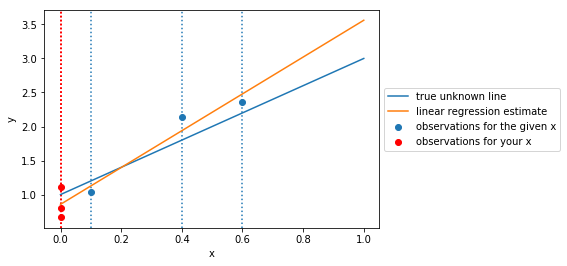

In [4]:
def simulate_oracle(x4, x5, x6):
    xx0=np.array([0.1,0.4,0.6])
    xx1=np.array([x4,x5,x6])
    x =np.hstack([xx0,xx1])
    y0=slope*xx0+intercept +np.random.randn(len(xx0))*sigma
    y1=slope*xx1+intercept +np.random.randn(len(xx1))*sigma    
    y=np.hstack([y0,y1])
    #linear regression
    H=np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
    beta=np.dot(np.linalg.matrix_power(np.dot(H.T,H),-1),np.dot(H.T,y.reshape(-1,1)))
    
    plt.scatter(xx0,y0,label='observations for the given x')
    plt.axvline(x=x[0], linestyle=':')
    plt.axvline(x=x[1], linestyle=':')
    plt.axvline(x=x[2], linestyle=':')
    plt.scatter(xx1,y1,label='observations for your x',color='r')
    plt.axvline(x=x[3], linestyle=':',color='r')
    plt.axvline(x=x[4], linestyle=':',color='r')
    plt.axvline(x=x[5], linestyle=':',color='r')

    plt.plot(np.array([0,1]),slope*np.array([0,1])+intercept ,label='true unknown line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(np.array([0,1]),beta[1]*np.array([0,1])+beta[0],label='linear regression estimate')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

interactive_plot = interactive(simulate_oracle, x4=(0, 1.0, 0.1), x5=(0, 1, 0.1) , x6=(0, 1, 0.1))
interactive_plot
